In [29]:
#import 작업 
#requests = 브라우저의 역할을 대신(요청, 응답정보를 처리)
import requests as req

In [30]:
# 1. 네이버url을 통해서 사이트를 요청
# req야 네이버 페이지좀 가져와줘!
# <Response [200]> = 통신에 성공했습니다.
res = req.get("https://www.naver.com")   #문자열 형태로 URL을 넣어야함

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
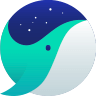
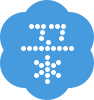

In [31]:
# 2. 응답받은 페이지에서 원하는 정보를 추출(카페, 블로그 등과 글자 수집)
res.text

# 컴퓨터가 알아먹을 수 있는 언어로 변형
## beautifulSoup 라이브러리
- 응답받은 텍스트 데이터를 HTML데이터로 변형시켜주는 역할

In [32]:
#스톤숩은 사용하지 않는다!
from bs4 import BeautifulSoup as bs

In [33]:
#bs아 내가 가지고 있는 글자정보를 HTML정보로 바꿔줘
#bs("내가 가지고 있는 정보", "파싱방법")
soup = bs(res.text, "lxml")

In [34]:
# 네이버 페이지에서 카페, 블로그, 지식인.. 글자를 수집해줘
# 데이터에서 a태그만 수집해줘~
data = soup.select("a.nav")

In [35]:
data[2].text

'블로그'

In [36]:
for i in data:
    print(i.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
책
웹툰


# 뉴스 타이틀 수집

In [88]:
req.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%9E%A5%EB%A7%88")

<Response [200]>

In [89]:
res2=req.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%9E%A5%EB%A7%88")

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="장마 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'장마\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'장마\'의 네이버 뉴스검색 결과입니다."> <title>장마 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220707.css"> <link rel="stylesheet" type="text/css" href="ht
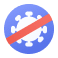
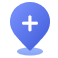
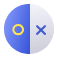
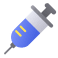

In [90]:
res2.text

In [91]:
soup2=bs(res2.text, "lxml")

In [92]:
soup2.select("a.news_tit")

[<a class="news_tit" href="https://www.ytn.co.kr/_ln/0101_202207100915553219" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=880000AF_000000000000000001762106&amp;g=052.0001762106&amp;u='+urlencode(this.href));" target="_blank" title='"北, 장마 피해로 9월까진 핵실험 안 할 것"'>"北, <mark>장마</mark> 피해로 9월까진 핵실험 안 할 것"</a>,
 <a class="news_tit" href="https://www.gukjenews.com/news/articleView.html?idxno=2505374" onclick="return goOtherCR(this, 'a=nws*b.tit&amp;r=6&amp;i=8813C2D5_000000000000000001592241&amp;g=5291.0001592241&amp;u='+urlencode(this.href));" target="_blank" title="[오늘날씨] 수도권·강원 '80mm천둥번개 비' 서울날씨, 2022년 장마기간">[오늘날씨] 수도권·강원 '80mm천둥번개 비' 서울날씨, 2022년 <mark>장마</mark>기간</a>,
 <a class="news_tit" href="https://www.jeonmae.co.kr/news/articleView.html?idxno=901420" onclick="return goOtherCR(this, 'a=nws*b.tit&amp;r=8&amp;i=88213rug_000000000000000000057144&amp;g=5844.0000057144&amp;u='+urlencode(this.href));" target="_blank" title="서울날씨, 오후까지 20mm '제주도 오늘날씨' 2022년 장마기간">서울날씨, 오후까지 20mm

In [93]:
data2 = soup2.select("a.news_tit")

In [94]:
for i in data2:
    print(i.text)

"北, 장마 피해로 9월까진 핵실험 안 할 것"
[오늘날씨] 수도권·강원 '80mm천둥번개 비' 서울날씨, 2022년 장마기간
서울날씨, 오후까지 20mm '제주도 오늘날씨' 2022년 장마기간
북한 13~14일 또 폭우…홍수경보 발령 등 장마대책 안간힘
장마·폭염 반복에… 날씨 관련 트윗 최근 320만건 달해
[1일IT템] 14일에 뜨는 수퍼문… 장마에 못보나
마른 장마에 저수량 감소…광주시 "수돗물 아껴쓰세요"
반가운 장마
일요일 오늘날씨, 대구35도 폭염 '월요일부터 비온다' 서울날씨 2022년장마기...
여름 장마·무더위 아이템은 ‘미니멀·초경량’
